In [ ]:
import pandas as pd

# load the dataset
df = pd.read_csv('Cleaned_News_Articles_Final2.csv')

In [ ]:
df.head(10)

In [ ]:
df[df['date published'].isna()]

In [ ]:
df = df.drop(columns=['text'])
df

Replacing the missing date data (Metadata given is 2023-01-01 to 2023-10-06)

In [ ]:
from datetime import datetime, timedelta

# sequential dates from 2023-01-01 to 2023-10-06
start_date = datetime.strptime('2023-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2023-10-06', '%Y-%m-%d')
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# convert to datetime format
df['date published'] = pd.to_datetime(df['date published'], errors='coerce')

# find where dates are missing
missing_indices = df[df['date published'].isna()].index

# count number of missing dates
num_missing = len(missing_indices)

# count number of dates in the range
num_dates = len(date_range)

# count how many times each date should be repeated
repeats_per_date = num_missing // num_dates
extra_repeats = num_missing % num_dates

# create list to fill the missing dates
fill_dates = []
for date in date_range:
    fill_dates.extend([date] * repeats_per_date)

# assign the extra repeats to the first few dates
for i in range(extra_repeats):
    fill_dates.append(date_range[i])

# sort the dates from 2023-01-01 to 2023-10-06
fill_dates = sorted(fill_dates)

# start filling
for i, index in enumerate(missing_indices):
    df.at[index, 'date published'] = fill_dates[i]

# save new csv file
output_path = 'Cleaned_News_Articles_Final2_datefilled.csv'
df.to_csv(output_path, index=False)

Use Afinn Dataset to plot correlation analysis as its evaluation metrics is highest 

In [13]:
import pandas as pd

# load the dataset
df = pd.read_csv('Correlation_Analysis_afinn.csv')

In [14]:
df

,date published,category,headline,sentiment,sentiment_score
0,15-07-21 2:46,news,shortage trucker simple think solution driver ...,negative,-1
1,12-05-21 7:52,news,bio servo robotic iron hand could protect fact...,negative,-1
2,16-06-21 2:51,news,swarm robot get smarter work,positive,2
3,15-03-22 9:57,business,russia longer option investor emerging market,neutral,0
4,15-03-22 11:27,business,russian energy investment ban part new sanctio...,negative,-2
...,...,...,...,...,...
41790,06-10-23 0:00,politics,mccarthy commits key concession call frustrate...,positive,4
41791,06-10-23 0:00,politics,know suspected chinese spy balloon,negative,-1
41792,06-10-23 0:00,politics,shot suspected chinese surveillance balloon ac...,negative,-1
41793,06-10-23 0:00,politics,chinese engineer sentenced year prison spying,negative,-4


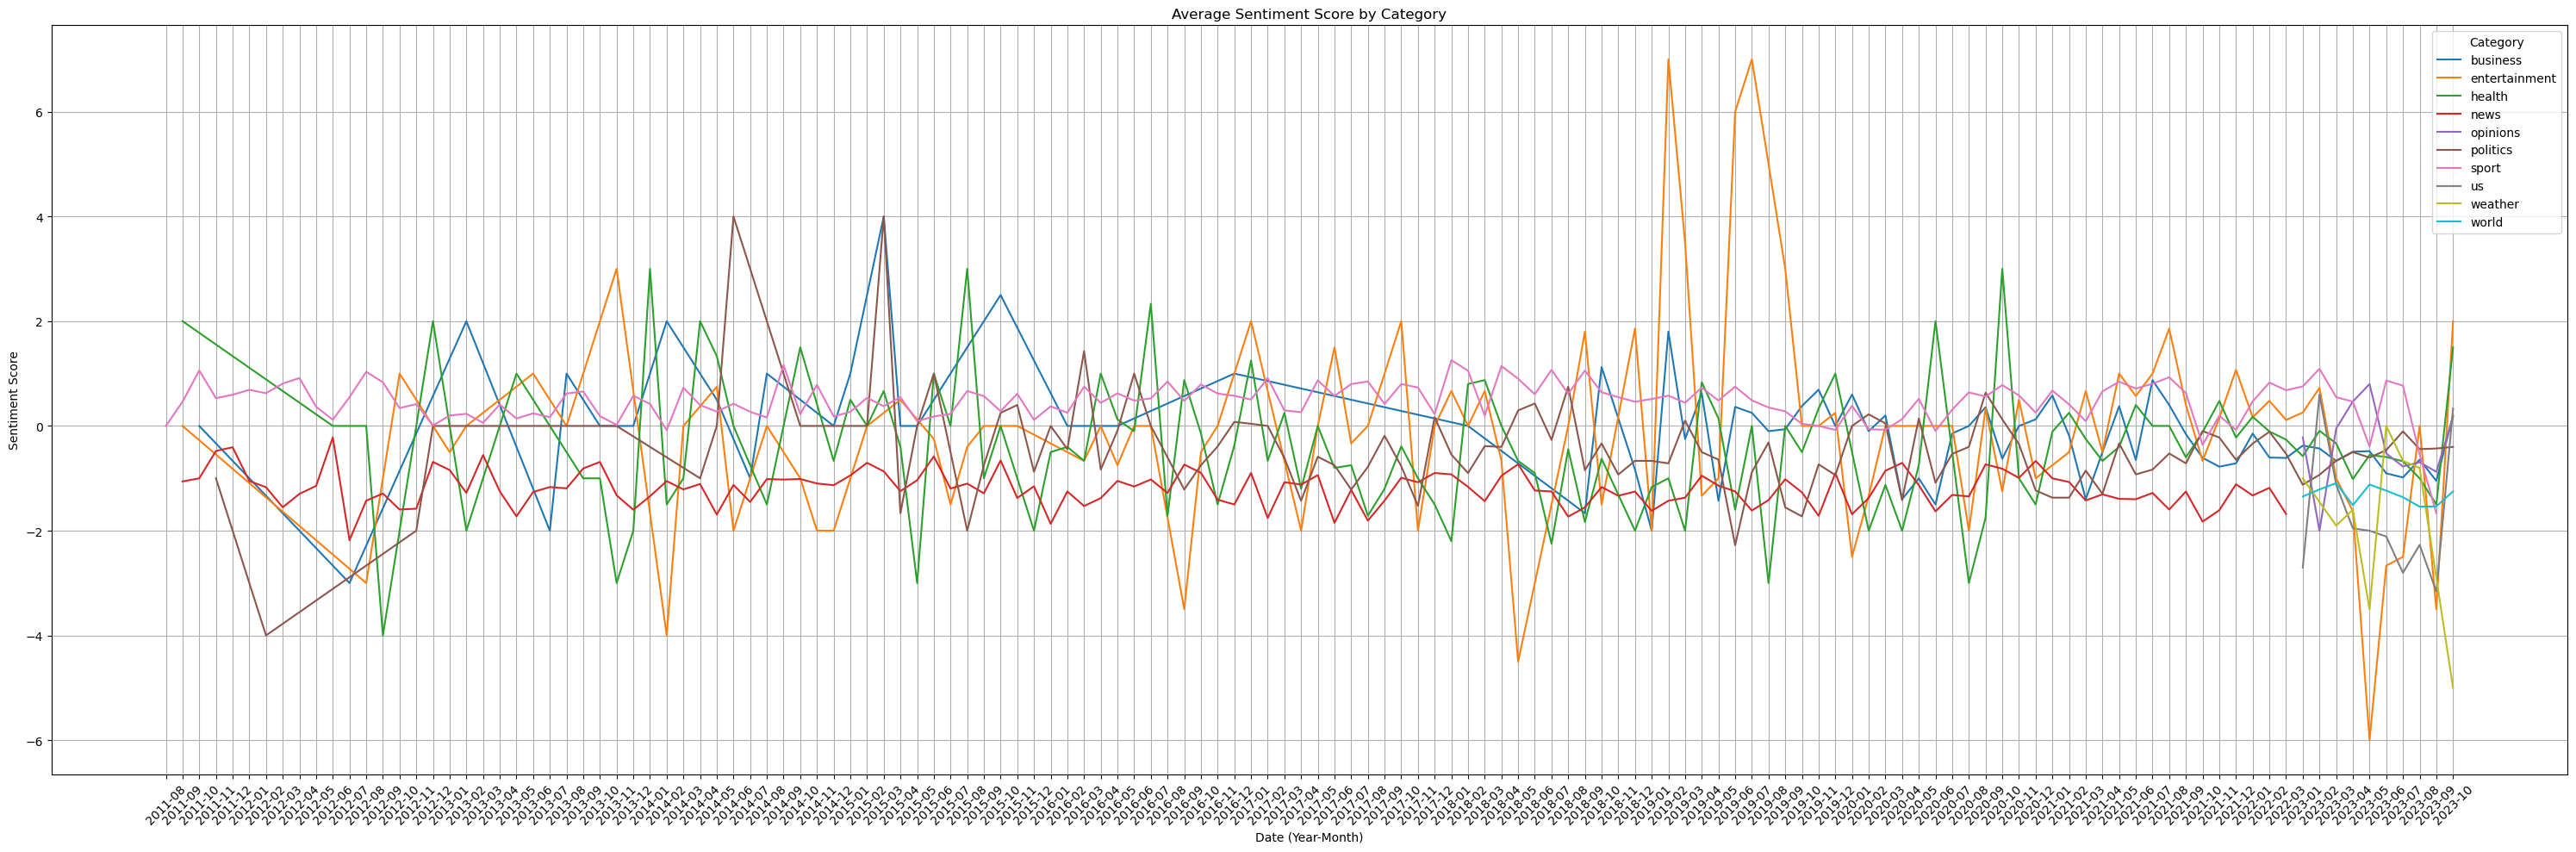

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date published' to datetime format
df['date published'] = pd.to_datetime(df['date published'], format='%d-%m-%y %H:%M', errors='coerce')

# Extract year and month for grouping
df['year_month'] = df['date published'].dt.to_period('M')

# Drop rows where 'year_month' is NaN (if any)
df = df.dropna(subset=['year_month'])

# Group by 'year_month' and 'category', then calculate the average sentiment score
monthly_avg_sentiment = df.groupby(['year_month', 'category'])['sentiment_score'].mean().reset_index()

# Pivot the data to get categories as columns
pivot_data = monthly_avg_sentiment.pivot(index='year_month', columns='category', values='sentiment_score')

# Ensure all values in pivot_data are numeric
pivot_data = pivot_data.apply(pd.to_numeric, errors='coerce')

# Reset index and convert 'year_month' to string for plotting
pivot_data.reset_index(inplace=True)
pivot_data['year_month'] = pivot_data['year_month'].astype(str)

# Melt the DataFrame for Seaborn plotting
melted_data = pivot_data.melt(id_vars='year_month', var_name='category', value_name='sentiment_score')

# Plotting
plt.figure(figsize=(30, 10))
sns.lineplot(data=melted_data, x='year_month', y='sentiment_score', hue='category')
plt.title('Average Sentiment Score by Category')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()